In [5]:
#### UNSUPERVISED LEARNING TECHNIQUES ####

In [32]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "unsupervised_learning"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [7]:
### CLUSTERING ###

In [8]:
## K-MEANS ##

In [9]:
# Let's start by generating some blobs

from sklearn.datasets import make_blobs

In [10]:
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [11]:
X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std, random_state=7)

In [12]:
# Now let's plot them
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

Saving figure blobs_plot


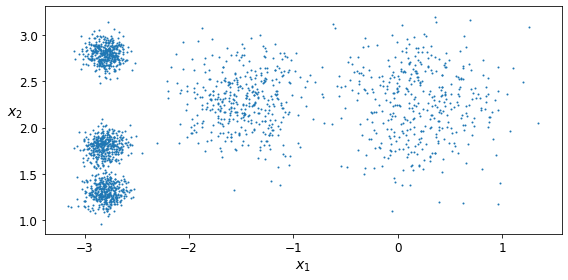

In [13]:
plt.figure(figsize=(8, 4))
plot_clusters(X)
save_fig("blobs_plot")
plt.show()

In [14]:
# Let's train a K-Means clusterer on this dataset.
# It will try to find each blob's center and assign each instance to the closest blob

from sklearn.cluster import KMeans

In [15]:
k = 5 # number of clusters k that the algorithm must find
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

In [16]:
# Each instance was assigned to one of the 5 clusters
y_pred

array([4, 0, 1, ..., 2, 1, 0])

In [17]:
y_pred is kmeans.labels_

True

In [18]:
# And the following 5 centroids (i.e., cluster centers) were estimated
kmeans.cluster_centers_

array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80037642,  1.30082566]])

In [19]:
# Somewhat confusingly, in this context, the label of an instance is the index of the cluster that instance gets assigned to
kmeans.labels_

array([4, 0, 1, ..., 2, 1, 0])

In [20]:
# Of course, we can predict the labels of new instances
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 2, 2])

In [21]:
# Let's plot the model's decision boundaries.
# This gives us a Voronoi diagram

def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

Saving figure voronoi_plot


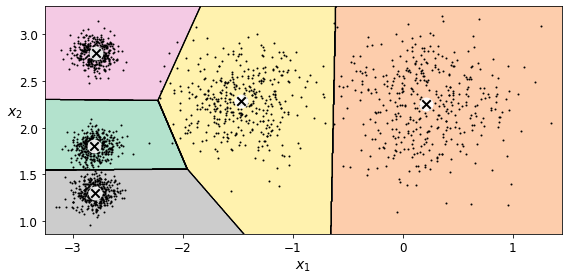

In [22]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
save_fig("voronoi_plot")
plt.show()

In [23]:
# Hard Clustering vs Soft Clustering

# Rather than arbitrarily choosing the closest cluster for each instance, which is called hard clustering,
# it might be better measure the distance of each instance to all 5 centroids.
# This is what the transform() method does:

In [24]:
kmeans.transform(X_new)

array([[2.81093633, 0.32995317, 2.9042344 , 1.49439034, 2.88633901],
       [5.80730058, 2.80290755, 5.84739223, 4.4759332 , 5.84236351],
       [1.21475352, 3.29399768, 0.29040966, 1.69136631, 1.71086031],
       [0.72581411, 3.21806371, 0.36159148, 1.54808703, 1.21567622]])

In [25]:
# You can verify that this is indeed the Euclidian distance between each instance and each centroid

np.linalg.norm(np.tile(X_new, (1, k)).reshape(-1, k, 2) - kmeans.cluster_centers_, axis=2)

array([[2.81093633, 0.32995317, 2.9042344 , 1.49439034, 2.88633901],
       [5.80730058, 2.80290755, 5.84739223, 4.4759332 , 5.84236351],
       [1.21475352, 3.29399768, 0.29040966, 1.69136631, 1.71086031],
       [0.72581411, 3.21806371, 0.36159148, 1.54808703, 1.21567622]])

In [26]:
## THE K-MEANS ALGORITHM ##

In [27]:
# The K-Means algorithm is one of the fastest clustering algorithms, and also one of the simplest

# First initialize k centroids randomly: k distinct instances are chosen randomly from the dataset and the centroids are placed at their locations
# Repeat until convergence (i.e., until the centroids stop moving):
#     * Assign each instance to the closest centroid
#     * Update the centroids to be the mean of the instances that are assigned to them

In [28]:
# The KMeans class applies an optimized algorithm by default.
# To get the original K-Means algorithm (for educational purposes only), you must set
# init="random", n_init=1 and algorithm="full"

In [29]:
# Let's run the K-Means algorithm for 1, 2 and 3 iterations, to see how the centroids move around

kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1, algorithm="full", max_iter=1, random_state=42)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1, algorithm="full", max_iter=2, random_state=42)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1, algorithm="full", max_iter=3, random_state=42)

kmeans_iter1.fit(X) # K-Means for 1 iteration
kmeans_iter2.fit(X) # K-Means for 2 iterations
kmeans_iter3.fit(X) # K-Means for 3 iterations

KMeans(algorithm='full', init='random', max_iter=3, n_clusters=5, n_init=1,
       random_state=42)

Saving figure kmeans_algorithm_plot


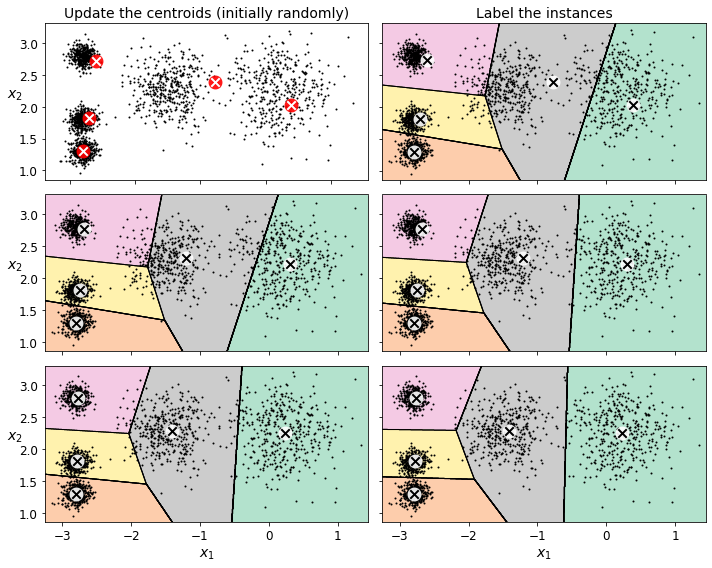

In [30]:
# And let's plot this

plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

save_fig("kmeans_algorithm_plot")
plt.show()

In [31]:
## CENTROID INITIALIZATION METHODS ##

In [32]:
# If you happen to know approximately where the centroids should be (e.g., if you ran
# another clustering algorithm earlier), then you can set the init hyperparameter to a
# NumPy array containing the list of centroids, and set n_init to 1

good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1)
kmeans.fit(X)
kmeans.inertia_

211.5985372581683

In [33]:
# The KMeans class runs the algorithm n_init times and keeps the model with the lowest inertia
# Inertia is the sum of the squared distances between each training instance and its closest centroid

In [34]:
kmeans_plus_plus = KMeans() # init="k-means++" by default
kmeans_plus_plus.fit(X)
kmeans_plus_plus.inertia_

119.1198341610289

In [35]:
kmeans_plus_plus.score(X) # negative inertia: because predictor's score() method must always respect sklearn "greater is better"

-119.11983416102888

In [36]:
## MINI-BATCH K-MEANS ##

In [37]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5)
minibatch_kmeans.fit(X)

F:\anaconda3\envs\tf-keras-gpu\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


MiniBatchKMeans(n_clusters=5)

In [38]:
minibatch_kmeans.inertia_

211.9937370073298

In [39]:
# If the dataset does not fit in memory, the simplest option is to use the memmap class,
# just like we did for incremental PCA in the previous chapter.

In [40]:
# First let's load MNIST dataset
import urllib.request
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.int64)

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(mnist["data"], mnist["target"], random_state=42)

In [42]:
# Next, let's write it to a memmap

In [43]:
# Big file size
# filename = "my_mnist.data"
# X_mm = np.memmap(filename, dtype='float32', mode='write', shape=X_train.shape)
# X_mm[:] = X_train

In [44]:
# minibatch_kmeans = MiniBatchKMeans(n_clusters=10, batch_size=10, random_state=42)
# minibatch_kmeans.fit(X_mm)

In [45]:
## FINDING THE OPTIMAL NUMBER OF CLUSTERS ##

In [47]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

Saving figure bad_n_clusters_plot


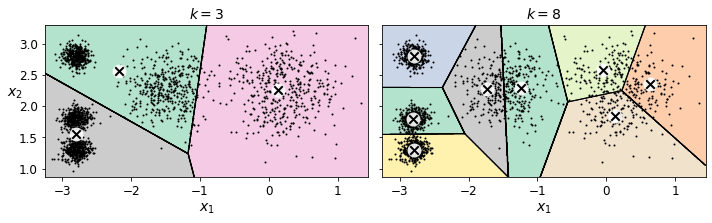

In [48]:
# What if the number of clusters was set to a lower or greater value than 5?

kmeans_k3 = KMeans(n_clusters=3, random_state=42)
kmeans_k8 = KMeans(n_clusters=8, random_state=42)

plot_clusterer_comparison(kmeans_k3, kmeans_k8, X, "$k=3$", "$k=8$")
save_fig("bad_n_clusters_plot")
plt.show()

In [49]:
# Ouch, these two models don't look great. What about their inertias?
kmeans_k3.inertia_

653.2167190021556

In [50]:
kmeans_k8.inertia_

119.1198341610289

In [51]:
# No, we cannot simply take the value of k that minimizes the inertia, since it keeps getting lower as we increase k.
# Indeed, the more clusters there are, the closer each instance will be to its closest centroid,
# and therefore the lower the inertia will be. 

In [52]:
# Another approach is to look at the silhouette score, which is the mean silhouette coefficient over all the instances.
from sklearn.metrics import silhouette_score

silhouette_score(X, kmeans.labels_)

0.655517642572828

In [53]:
### LIMITS OF K-MEANS ###

In [54]:
### USING CLUSETERING FOR IMAGE SEGMENTATION ###

In [55]:
# Download the ladybug image
images_path = os.path.join(PROJECT_ROOT_DIR, "images", "unsupervised_learning")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "ladybug.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/unsupervised_learning/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('.\\images\\unsupervised_learning\\ladybug.png',
 <http.client.HTTPMessage at 0x2cde54b9c40>)

In [56]:
from matplotlib.image import imread
image = imread(os.path.join(images_path, filename))
image.shape

(533, 800, 3)

In [102]:
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8, random_state=42).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape) # reshape to the original shape

In [123]:
X[200000]

array([0.14901961, 0.41568628, 0.        ], dtype=float32)

In [104]:
X.shape

(426400, 3)

In [109]:
kmeans.labels_.shape # each pixel will have a color (from 8 colors)

(426400,)

In [120]:
np.unique(kmeans.labels_)

array([0, 1, 2, 3, 4, 5, 6, 7])

In [106]:
kmeans.cluster_centers_

array([[0.98351526, 0.9358979 , 0.02575099],
       [0.02285829, 0.11067164, 0.00578479],
       [0.21913776, 0.3867503 , 0.05799938],
       [0.75775623, 0.21225451, 0.0445884 ],
       [0.09990539, 0.2542202 , 0.01693691],
       [0.612661  , 0.63010174, 0.3875082 ],
       [0.3721028 , 0.5235778 , 0.15729745],
       [0.8845895 , 0.72559094, 0.03441923]], dtype=float32)

In [124]:
kmeans.labels_

array([1, 1, 1, ..., 4, 1, 1])

In [125]:
kmeans.cluster_centers_[kmeans.labels_]

array([[0.02285829, 0.11067164, 0.00578479],
       [0.02285829, 0.11067164, 0.00578479],
       [0.02285829, 0.11067164, 0.00578479],
       ...,
       [0.09990539, 0.2542202 , 0.01693691],
       [0.02285829, 0.11067164, 0.00578479],
       [0.02285829, 0.11067164, 0.00578479]], dtype=float32)

In [58]:
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

Saving figure image_segmentation_diagram


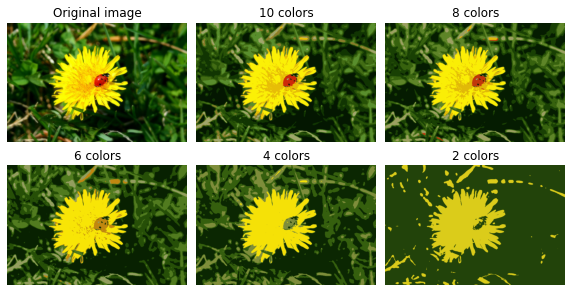

In [59]:
plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(231)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title("{} colors".format(n_clusters))
    plt.axis('off')

save_fig('image_segmentation_diagram', tight_layout=False)
plt.show()

In [61]:
### USING CLUSTERING FOR PREPROCESSING ###

In [62]:
# Clustering can be an efficient approach to dimensionality reduction, in particular as a
# preprocessing step before a supervised learning algorithm

In [63]:
# Let's tackle the digits dataset which is a simple MNIST-like dataset
# containing 1,797 grayscale 8×8 images representing digits 0 to 9

from sklearn.datasets import load_digits

In [64]:
X_digits, y_digits = load_digits(return_X_y=True)

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state=42)

In [66]:
# Now let's fit a Logistic Regression model and evaluate it on the test set
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

In [67]:
log_reg_score = log_reg.score(X_test, y_test)
log_reg_score

0.9688888888888889

In [68]:
# Okay, that's our baseline: 96.88% accuracy.
# Let's see if we can do better by using K-Means as a preprocessing step

In [70]:
# We will create a pipeline that will first cluster the training set into 50 clusters and
# replace the images with their distances to the 50 clusters, then apply a logistic regression model:

# Since there are 10 different digits, it is tempting to set the number of clusters to 10
# However, each digit can be written several different ways, so it is preferable to use a larger number of clusters, such as 50

from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=50, random_state=42)),
    ("log_reg", LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)),
])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('kmeans', KMeans(n_clusters=50, random_state=42)),
                ('log_reg',
                 LogisticRegression(max_iter=5000, multi_class='ovr',
                                    random_state=42))])

In [72]:
pipeline.score(X_test, y_test)

0.9777777777777777

In [74]:
1 - (1 - pipeline_score) / (1 - log_reg_score)
# How about that? We reduced the error rate by almost 30% (from about 3.1% to about 2.2%)

0.28571428571428414

In [75]:
# But we chose the number of clusters k arbitrarily; we can surely do better. Since KMeans 
# is just a preprocessing step in a classification pipeline, finding a good value for
# k is much simpler than earlier. There’s no need to perform silhouette analysis or mini‐
# mize the inertia; the best value of k is simply the one that results in the best classifica‐
# tion performance during cross-validation. We can use GridSearchCV to find the
# optimal number of clusters

In [80]:
from sklearn.model_selection import GridSearchCV

# This cell takes ~30 minutes to run
param_grid = dict(kmeans__n_clusters=range(2, 100))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
# grid_clf.fit(X_train, y_train)

In [81]:
# grid_clf.best_params_
# Output: {'kmeans__n_clusters': 57}

In [82]:
# grid_clf.score(X_test, y_test)
# Output: 0.98

In [83]:
### USING CLUSTERING FOR SEMI-SUPERVIED LEARNING ###

In [85]:
# Another use case for clustering is in semi-supervised learning,
# when we have plenty of unlabeled instances and very few labeled instances.

In [86]:
# Let's look at the performance of a logistic regression model when we only have 50 labeled instances

In [87]:
n_labeled = 50

In [88]:
# Train the model in a supervised manner (provide labels) with only 50 images
# Test the model on the entire test set
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", random_state=42)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])
log_reg.score(X_test, y_test)
# (Earlier, we trained the model on the full training set)

0.8333333333333334

In [89]:
# Let's see how we can do better.
# First, let's cluster the training set into 50 clusters, then for each cluster let's find the image closest to the centroid.
# We will call these images the 'representative images'

In [90]:
k = 50
kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)

representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]

Saving figure representative_images_diagram


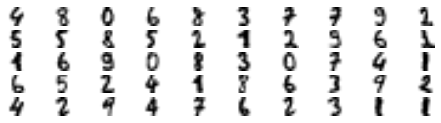

In [91]:
# Now let's plot these representative images and label them manually
plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis('off')

save_fig("representative_images_diagram", tight_layout=False)
plt.show()

In [92]:
y_train[representative_digit_idx]

array([4, 8, 0, 6, 8, 3, 7, 7, 9, 2, 5, 5, 8, 5, 2, 1, 2, 9, 6, 1, 1, 6,
       9, 0, 8, 3, 0, 7, 4, 1, 6, 5, 2, 4, 1, 8, 6, 3, 9, 2, 4, 2, 9, 4,
       7, 6, 2, 3, 1, 1])

In [93]:
y_representative_digits = np.array(y_train[representative_digit_idx])

In [94]:
# Now we have a dataset with just 50 labeled instances, but instead of being completely random instances,
# each of them is a representative image of its cluster.

# Let's see if the performance is any better:

log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

# Wow! We jumped from 83.3% accuracy to 92.2%, although we are still only training the model on 50 instances.

0.9222222222222223

In [95]:
# Since it is often costly and painful to label instances, especially when it has to be done manually by experts, 
# it is a good idea to label representative instances rather than just random instances.

In [96]:
# But perhaps we can go one step further: what if we propagated the labels to all the other instances in the same cluster?
# This is called label propagation

In [97]:
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

In [98]:
# Now let’s train the model again and look at its performance
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train_propagated)

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

In [99]:
log_reg.score(X_test, y_test)
# We got a tiny little accuracy boost

0.9333333333333333

In [138]:
### DBSCAN ###

In [140]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

In [141]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [145]:
dbscan.labels_[:10]
# index -1 = those instances are considered as anomalies by the algorithm

array([ 0,  2, -1, -1,  1,  0,  0,  0,  2,  5], dtype=int64)

In [143]:
len(dbscan.core_sample_indices_)

808

In [146]:
dbscan.core_sample_indices_[:10]

array([ 0,  4,  5,  6,  7,  8, 10, 11, 12, 13], dtype=int64)

In [149]:
dbscan.components_

array([[-0.02137124,  0.40618608],
       [-0.84192557,  0.53058695],
       [ 0.58930337, -0.32137599],
       ...,
       [ 1.66258462, -0.3079193 ],
       [-0.94355873,  0.3278936 ],
       [ 0.79419406,  0.60777171]])

In [148]:
np.unique(dbscan.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6], dtype=int64)

In [150]:
# Let's try epsilon=0.2
dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)

DBSCAN(eps=0.2)

In [151]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

Saving figure dbscan_plot


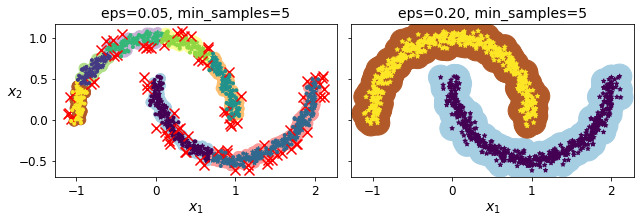

In [152]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

save_fig("dbscan_plot")
plt.show()

In [153]:
# Let's use the dbscan model with eps=0.2
dbscan = dbscan2

In [157]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)

# Train the classifier only on the core instances
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [155]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)

array([1, 0, 1, 0], dtype=int64)

In [156]:
knn.predict_proba(X_new)

array([[0.18, 0.82],
       [1.  , 0.  ],
       [0.12, 0.88],
       [1.  , 0.  ]])

Saving figure cluster_classification_plot


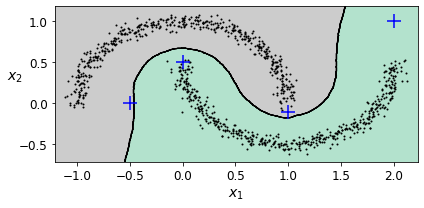

In [158]:
plt.figure(figsize=(6, 3))
plot_decision_boundaries(knn, X, show_centroids=False)
plt.scatter(X_new[:, 0], X_new[:, 1], c="b", marker="+", s=200, zorder=10)
save_fig("cluster_classification_plot")
plt.show()

In [159]:
# For anomalies detection
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.2] = -1
y_pred.ravel()

array([-1,  0,  1, -1], dtype=int64)

In [160]:
## OTHER CLUSTERING ALGORITHMS ##

In [161]:
### GAUSSIAN MIXTURES ###

In [162]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))

X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]

X = np.r_[X1, X2]
y = np.r_[y1, y2]

In [163]:
# Let's train a Gaussian mixture model on the previous dataset

In [164]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10, random_state=42)

In [165]:
# Let's look at the parameters that the algorithm estimated
gm.weights_ # phi

array([0.39025715, 0.40007391, 0.20966893])

In [166]:
gm.means_ # miu

array([[ 0.05131611,  0.07521837],
       [-1.40763156,  1.42708225],
       [ 3.39893794,  1.05928897]])

In [167]:
gm.covariances_ # sigma

array([[[ 0.68799922,  0.79606357],
        [ 0.79606357,  1.21236106]],

       [[ 0.63479409,  0.72970799],
        [ 0.72970799,  1.1610351 ]],

       [[ 1.14833585, -0.03256179],
        [-0.03256179,  0.95490931]]])

In [168]:
# Did the algorithm actually converge?
gm.converged_

True

In [169]:
# Yes, good. How many iterations did it take?
gm.n_iter_

4

In [171]:
# You can now use the model to predict which cluster each instance belongs to (hard clustering)
# or the probabilities that it came from each cluster. For this, just use predict() method or the predict_proba() method

In [172]:
gm.predict(X)

array([0, 0, 1, ..., 2, 2, 2], dtype=int64)

In [173]:
gm.predict_proba(X)

array([[9.76741808e-01, 6.78581203e-07, 2.32575136e-02],
       [9.82832955e-01, 6.76173663e-04, 1.64908714e-02],
       [7.46494398e-05, 9.99923327e-01, 2.02398402e-06],
       ...,
       [4.26050456e-07, 2.15512941e-26, 9.99999574e-01],
       [5.04987704e-16, 1.48083217e-41, 1.00000000e+00],
       [2.24602826e-15, 8.11457779e-41, 1.00000000e+00]])

In [174]:
# Now let's plot the resulting decision boundaries (dashed lines) and density contours
from matplotlib.colors import LogNorm

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

Saving figure gaussian_mixtures_plot


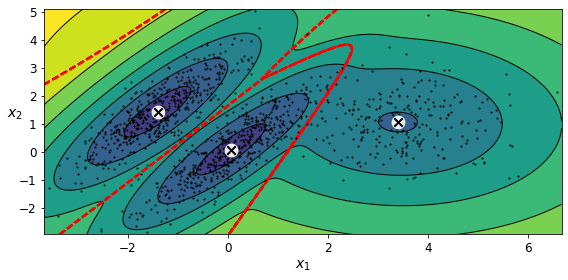

In [175]:
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X)

save_fig("gaussian_mixtures_plot")
plt.show()

In [176]:
## ANOMALY DETECTION USING GAUSSIAN MIXTURE ##

In [177]:
# Gaussian Mixtures can be used for anomaly detection: instances located in low-density regions can be considered anomalies.
# You must define what density threshold you want to use. For example, in a manufacturing company that tries to
# detect defective products, the ratio of defective products is usually well-known.
# Say it is equal to 4%, then you can set the density threshold to be the value that results in having 4% of
# the instances located in areas below that threshold density:

In [178]:
# Using a Gaussian mixture model for anomaly detection is quite simple:
# any instance located in a low-density regioncan be considered an anomaly

In [179]:
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 4)
anomalies = X[densities < density_threshold]

Saving figure mixture_anomaly_detection_plot


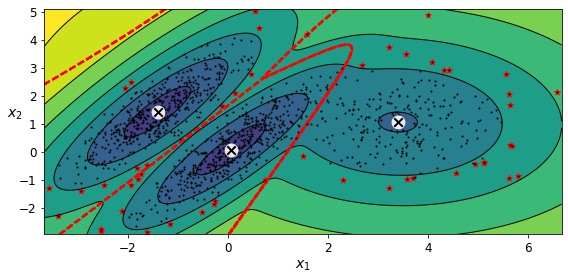

In [182]:
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X)
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='r', marker='*')
plt.ylim(top=5.1)

save_fig("mixture_anomaly_detection_plot")
plt.show()

In [184]:
## SELECTING THE NUMBER OF CLUSTERS ##

In [185]:
gm.bic(X)

8189.747000497186

In [186]:
gm.aic(X)

8102.521720382148

In [187]:
# Let's train Gaussian Mixture models with various values of  and measure their BIC
gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(X) for k in range(1, 11)]

F:\anaconda3\envs\tf-keras-gpu\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
F:\anaconda3\envs\tf-keras-gpu\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
F:\anaconda3\envs\tf-keras-gpu\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
F:\anaconda3\envs\tf-keras-gpu\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a m

In [188]:
bics = [model.bic(X) for model in gms_per_k]
aics = [model.aic(X) for model in gms_per_k]

Saving figure aic_bic_vs_k_plot


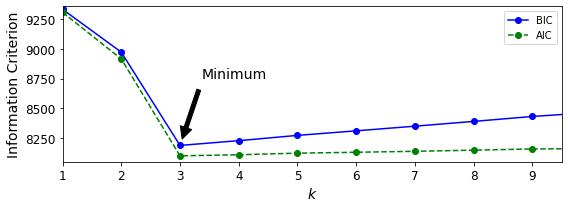

In [189]:
plt.figure(figsize=(8, 3))
plt.plot(range(1, 11), bics, "bo-", label="BIC")
plt.plot(range(1, 11), aics, "go--", label="AIC")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Information Criterion", fontsize=14)
plt.axis([1, 9.5, np.min(aics) - 50, np.max(aics) + 50])
plt.annotate('Minimum',
             xy=(3, bics[2]),
             xytext=(0.35, 0.6),
             textcoords='figure fraction',
             fontsize=14,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.legend()
save_fig("aic_bic_vs_k_plot")
plt.show()

In [190]:
# Let's search for best combination of values for both the number of clusters and the covariance_type hyperparameter

min_bic = np.infty

for k in range(1, 11):
    for covariance_type in ("full", "tied", "spherical", "diag"):
        bic = GaussianMixture(n_components=k, n_init=10,
                              covariance_type=covariance_type,
                              random_state=42).fit(X).bic(X)
        if bic < min_bic:
            min_bic = bic
            best_k = k
            best_covariance_type = covariance_type

F:\anaconda3\envs\tf-keras-gpu\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
F:\anaconda3\envs\tf-keras-gpu\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
F:\anaconda3\envs\tf-keras-gpu\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
F:\anaconda3\envs\tf-keras-gpu\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a m

F:\anaconda3\envs\tf-keras-gpu\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
F:\anaconda3\envs\tf-keras-gpu\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
F:\anaconda3\envs\tf-keras-gpu\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
F:\anaconda3\envs\tf-keras-gpu\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a m

In [191]:
best_k

3

In [192]:
best_covariance_type

'full'

In [193]:
## BAYESIAN GAUSSIAN MIXTURE MODELS ##

In [194]:
# Rather than manually searching for the optimal number of clusters, you can use the
# BayesianGaussianMixture class, which is capable of giving weights equal (or close)
# to zero to unnecessary clusters. Set the number of clusters n_components to a value
# that you have good reason to believe is greater than the optimal number of clusters
# (this assumes some minimal knowledge about the problem at hand), and the algo‐
# rithm will eliminate the unnecessary clusters automatically.

In [195]:
from sklearn.mixture import BayesianGaussianMixture

bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X)

BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)

In [196]:
# The algorithm automatically detected that only 3 components are needed
np.round(bgm.weights_, 2)

array([0.4 , 0.21, 0.4 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

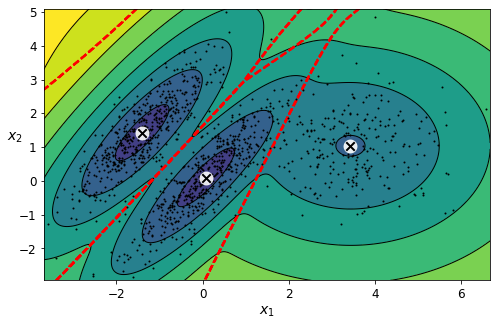

In [197]:
plt.figure(figsize=(8, 5))
plot_gaussian_mixture(bgm, X)
plt.show()

In [199]:
# Let’s see what happens if we use a Bayesian Gaussian mixture model to cluster the moons dataset 

X_moons, y_moons = make_moons(n_samples=1000, noise=0.05, random_state=42)

In [200]:
bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X_moons)

BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)

Saving figure moons_vs_bgm_plot


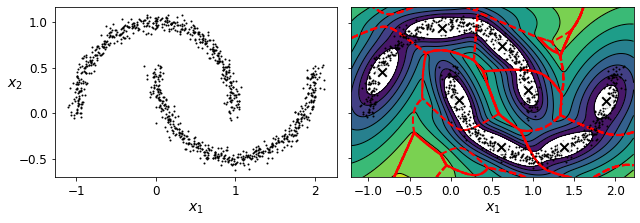

In [201]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_data(X_moons)
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14, rotation=0)

plt.subplot(122)
plot_gaussian_mixture(bgm, X_moons, show_ylabels=False)

save_fig("moons_vs_bgm_plot")
plt.show()

# Oops! The algorithm desperately searched for ellipsoids, so it found eight different
# clusters instead of two. The density estimation is not too bad, so this model could
# perhaps be used for anomaly detection, but it failed to identify the two moons.

In [1]:
### EXERCISES ###

In [2]:
# 1. How would you define clustering? Can you name a few clustering algorithms?

# Clustering is the unsupervised taks of grouping similar instances together.
# Popular clustering algorithms: K-Means, DBSCAN, ...

In [3]:
# 2. What are some of the main applications of clustering algorithms?

# Image segmentation
# Customer segmentation
# Dimensionality reduction
# Anomaly (and Novelty) detection
# Search engines

In [4]:
# 3. Describe two techniques to select the right number of clusters when using K-Means.

# Plot inertia function of k and select the 'elbow'
# Plot silhouette score function of k and select the peak

In [5]:
# 4. What is label propagation? Why would you implement it, and how?

# When we have a dataset with only a few instances labeled, we can run an unsupervised clustering algorithm
# (such as K-Means) and get some 'representative instances' for the entire dataset.

# Then, for each cluster find the most common label or
# the label of the most representative instance (the one closest to the centroid) and
# propagate it to the unlabeled instances in the same cluster

In [6]:
# 5. Can you name two clustering algorithms that can scale to large datasets? And two that look for regions of high density?

# Algorithms that can scale to large datasets: K-Means and BIRCH
# Algorithms that look for regions of high density: DBSCAN and Mean-Shift

In [7]:
# 6. Can you think of a use case where active learning would be useful? How would you implement it?

# Active learning is useful whenever you have plenty of unlabeled instances but
# labeling is costly. In this case (which is very common), rather than randomly
# selecting instances to label, it is often preferable to perform active learning,
# where human experts interact with the learning algorithm, providing labels for
# specific instances when the algorithm requests them

In [8]:
# 7. What is the difference between anomaly detection and novelty detection?

# Anomaly detection is performed on the entire dataset (may contain outliers)
# The clustering algorithm will cluster the 'normal data' and mark the outliers as anomalies

# When we want to perform novelty detection, we train the model on a 'clean dataset' (a dataset without outliers)
# The objective is to detect novelties striclty among new instances

# Some algorithms work best for anomaly detection (e.g., Isolation Forest), while
#  others are better suited for novelty detection (e.g., one-class SVM)

In [9]:
# 8. What is a Gaussian mixture? What tasks can you use it for?

# A Gaussian mixture model (GMM) is a probabilistic model that assumes that the
# instances were generated from a mixture of several Gaussian distributions whose
# parameters are unknown. In other words, the assumption is that the data is grou‐
# ped into a finite number of clusters, each with an ellipsoidal shape (but the clus‐
# ters may have different ellipsoidal shapes, sizes, orientations, and densities), and
# we don’t know which cluster each instance belongs to. This model is useful for
# density estimation, clustering, and anomaly detection.

In [10]:
# 9. Can you name two techniques to find the right number of clusters when using a Gaussian mixture model?

# One way to find the right number of clusters when using a Gaussian mixture
# model is to plot the Bayesian information criterion (BIC) or the Akaike informa‐
# tion criterion (AIC) as a function of the number of clusters, then choose the
# number of clusters that minimizes the BIC or AIC. Another technique is to use a
# Bayesian Gaussian mixture model, which automatically selects the number of clusters.

In [ ]:
# 10. The classic Olivetti faces dataset contains 400 grayscale 64 × 64–pixel images of
# faces. Each image is flattened to a 1D vector of size 4,096. 40 different people
# were photographed (10 times each), and the usual task is to train a model that
# can predict which person is represented in each picture. Load the dataset using
# the sklearn.datasets.fetch_olivetti_faces() function, then split it into a
# training set, a validation set, and a test set (note that the dataset is already scaled
# between 0 and 1). Since the dataset is quite small, you probably want to use strati‐
# fied sampling to ensure that there are the same number of images per person in
# each set. Next, cluster the images using K-Means, and ensure that you have a
# good number of clusters (using one of the techniques discussed in this chapter).
# Visualize the clusters: do you see similar faces in each cluster?

# Cluster the Olivetti Faces Dataset

In [11]:
from sklearn.datasets import fetch_olivetti_faces

olivetti = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\Iulian\scikit_learn_data


In [12]:
print(olivetti.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

In [13]:
olivetti.target
# 40 different people, 10 images each

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

In [27]:
from sklearn.model_selection import StratifiedShuffleSplit

# dataset -> train&val + test
strat_split = StratifiedShuffleSplit(n_splits=1, test_size=40, random_state=42)
train_valid_idx, test_idx = next(strat_split.split(olivetti.data, olivetti.target))
X_train_valid = olivetti.data[train_valid_idx]
y_train_valid = olivetti.target[train_valid_idx]
X_test = olivetti.data[test_idx]
y_test = olivetti.target[test_idx]

# train&val -> train + val
strat_split = StratifiedShuffleSplit(n_splits=1, test_size=80, random_state=43)
train_idx, valid_idx = next(strat_split.split(X_train_valid, y_train_valid))
X_train = X_train_valid[train_idx]
y_train = y_train_valid[train_idx]
X_valid = X_train_valid[valid_idx]
y_valid = y_train_valid[valid_idx]

In [28]:
print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape,  y_test.shape)

(280, 4096) (280,)
(80, 4096) (80,)
(40, 4096) (40,)


In [29]:
# To speed things up (training time), we'll reduce the data's dimensionality using PCA
from sklearn.decomposition import PCA

pca = PCA(0.99)
X_train_pca = pca.fit_transform(X_train)
X_valid_pca = pca.transform(X_valid)
X_test_pca  = pca.transform(X_test)

pca.n_components_

199

In [30]:
# Next, cluster the images using K-Means, and ensure that you have a good number of clusters
from sklearn.cluster import KMeans

k_range = range(5, 150, 5)
kmeans_per_k = []
for k in k_range:
    print("k={}".format(k))
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_train_pca)
    kmeans_per_k.append(kmeans)

k=5
k=10
k=15
k=20
k=25
k=30
k=35
k=40
k=45
k=50
k=55
k=60
k=65
k=70
k=75
k=80
k=85
k=90
k=95
k=100
k=105
k=110
k=115
k=120
k=125
k=130
k=135
k=140
k=145


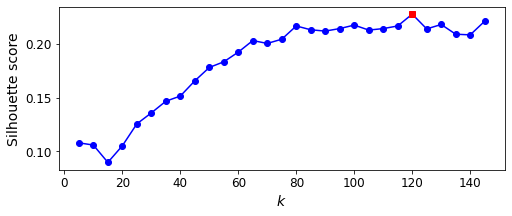

In [33]:
from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(X_train_pca, model.labels_)
                     for model in kmeans_per_k]
best_index = np.argmax(silhouette_scores)
best_k = k_range[best_index]
best_score = silhouette_scores[best_index]

plt.figure(figsize=(8, 3))
plt.plot(k_range, silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.plot(best_k, best_score, "rs")
plt.show()

In [34]:
best_k

120

In [35]:
# It looks like the best number of clusters is quite high, at 120.
# You might have expected it to be 40, since there are 40 different people on the pictures.
# However, the same person may look quite different on different pictures
# (e.g., with or without glasses, or simply shifted left or right)

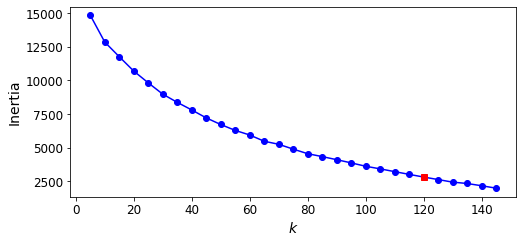

In [36]:
inertias = [model.inertia_ for model in kmeans_per_k]
best_inertia = inertias[best_index]

plt.figure(figsize=(8, 3.5))
plt.plot(k_range, inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.plot(best_k, best_inertia, "rs")
plt.show()

In [37]:
# The optimal number of clusters is not clear on this inertia diagram, as there is no obvious elbow, so let's stick with k=120

In [38]:
best_model = kmeans_per_k[best_index]

Cluster 0


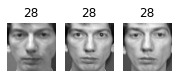

Cluster 1


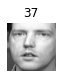

Cluster 2


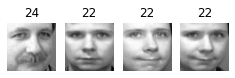

Cluster 3


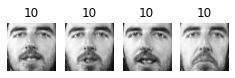

Cluster 4


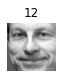

Cluster 5


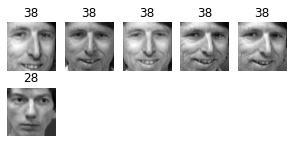

Cluster 6


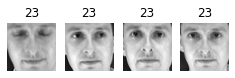

Cluster 7


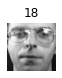

Cluster 8


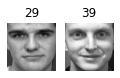

Cluster 9


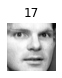

Cluster 10


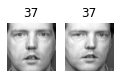

Cluster 11


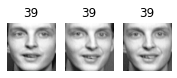

Cluster 12


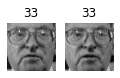

Cluster 13


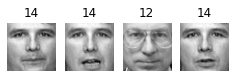

Cluster 14


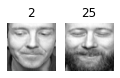

Cluster 15


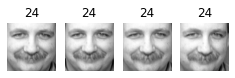

Cluster 16


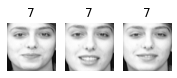

Cluster 17


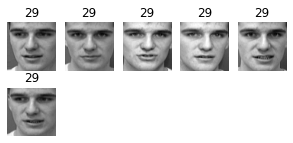

Cluster 18


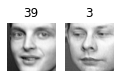

Cluster 19


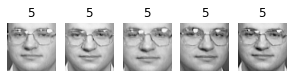

Cluster 20


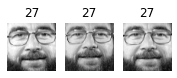

Cluster 21


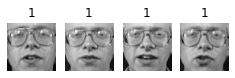

Cluster 22


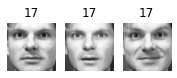

Cluster 23


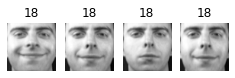

Cluster 24


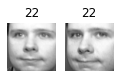

Cluster 25


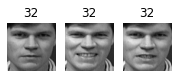

Cluster 26


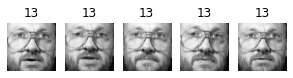

Cluster 27


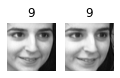

Cluster 28


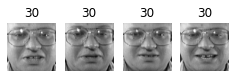

Cluster 29


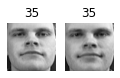

Cluster 30


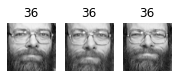

Cluster 31


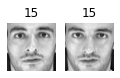

Cluster 32


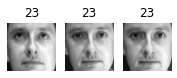

Cluster 33


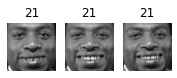

Cluster 34


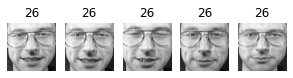

Cluster 35


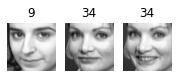

Cluster 36


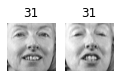

Cluster 37


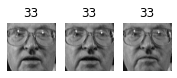

Cluster 38


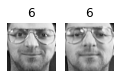

Cluster 39


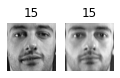

Cluster 40


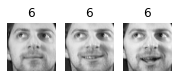

Cluster 41


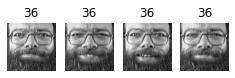

Cluster 42


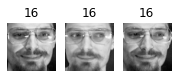

Cluster 43


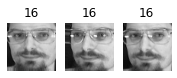

Cluster 44


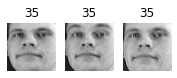

Cluster 45


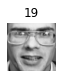

Cluster 46


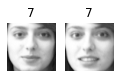

Cluster 47


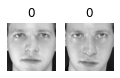

Cluster 48


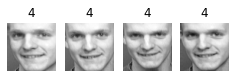

Cluster 49


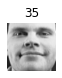

Cluster 50


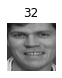

Cluster 51


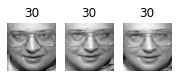

Cluster 52


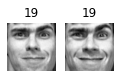

Cluster 53


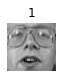

Cluster 54


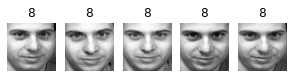

Cluster 55


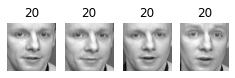

Cluster 56


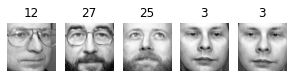

Cluster 57


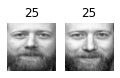

Cluster 58


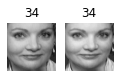

Cluster 59


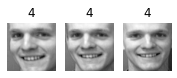

Cluster 60


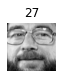

Cluster 61


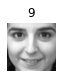

Cluster 62


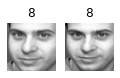

Cluster 63


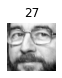

Cluster 64


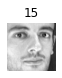

Cluster 65


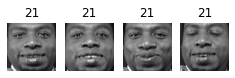

Cluster 66


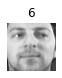

Cluster 67


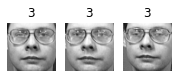

Cluster 68


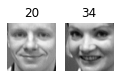

Cluster 69


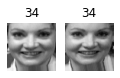

Cluster 70


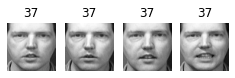

Cluster 71


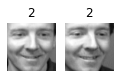

Cluster 72


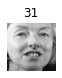

Cluster 73


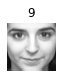

Cluster 74


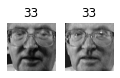

Cluster 75


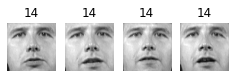

Cluster 76


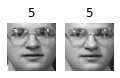

Cluster 77


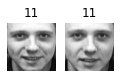

Cluster 78


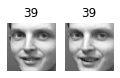

Cluster 79


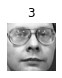

Cluster 80


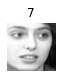

Cluster 81


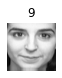

Cluster 82


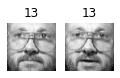

Cluster 83


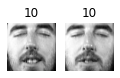

Cluster 84


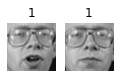

Cluster 85


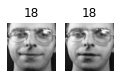

Cluster 86


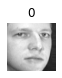

Cluster 87


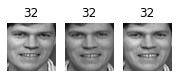

Cluster 88


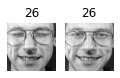

Cluster 89


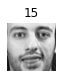

Cluster 90


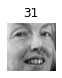

Cluster 91


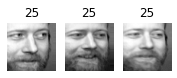

Cluster 92


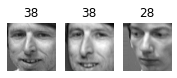

Cluster 93


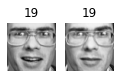

Cluster 94


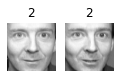

Cluster 95


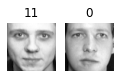

Cluster 96


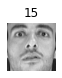

Cluster 97


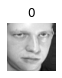

Cluster 98


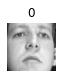

Cluster 99


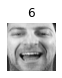

Cluster 100


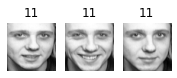

Cluster 101


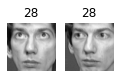

Cluster 102


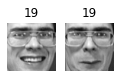

Cluster 103


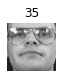

Cluster 104


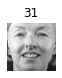

Cluster 105


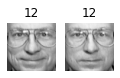

Cluster 106


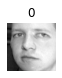

Cluster 107


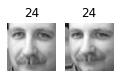

Cluster 108


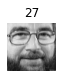

Cluster 109


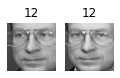

Cluster 110


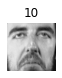

Cluster 111


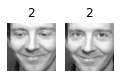

Cluster 112


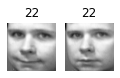

Cluster 113


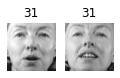

Cluster 114


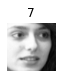

Cluster 115


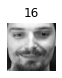

Cluster 116


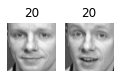

Cluster 117


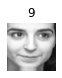

Cluster 118


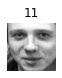

Cluster 119


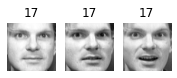

In [39]:
# Visualize the clusters: do you see similar faces in each cluster?
def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

for cluster_id in np.unique(best_model.labels_):
    print("Cluster", cluster_id)
    in_cluster = best_model.labels_==cluster_id
    faces = X_train[in_cluster]
    labels = y_train[in_cluster]
    plot_faces(faces, labels)

In [40]:
# About 2 out of 3 clusters are useful: that is, they contain at least 2 pictures, all of the same person.
# However, the rest of the clusters have either one or more intruders, or they have just a single picture

In [41]:
# Clustering images this way may be too imprecise to be directly useful when training a model (as we will see below),
# but it can be tremendously useful when labeling images in a new dataset: it will usually make labelling much faster.

In [42]:
# 11. Continuing with the Olivetti faces dataset, train a classifier to predict which per‐
# son is represented in each picture, and evaluate it on the validation set. Next, use
# K-Means as a dimensionality reduction tool, and train a classifier on the reduced
# set. Search for the number of clusters that allows the classifier to get the best per‐
# formance: what performance can you reach? What if you append the features
# from the reduced set to the original features (again, searching for the best num‐
# ber of clusters)?

# Using Clustering as Preprocessing for Classification

In [43]:
# Continuing with the Olivetti faces dataset, train a classifier to predict which person is
# represented in each picture,and evaluate it on the validation set

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train_pca, y_train)

clf.score(X_valid_pca, y_valid)

0.9

In [44]:
# Next, use K-Means as a dimensionality reduction tool, and train a classifier on the reduced set

X_train_reduced = best_model.transform(X_train_pca)
X_valid_reduced = best_model.transform(X_valid_pca)
X_test_reduced  = best_model.transform(X_test_pca)

clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train_reduced, y_train)
    
clf.score(X_valid_reduced, y_valid)

0.7

In [45]:
# Yikes! That's not better at all! Let's see if tuning the number of clusters helps.

# Search for the number of clusters that allows the classifier to get the best performance: what performance can you reach?

In [46]:
# We could use a GridSearchCV like we did earlier in this notebook, but since we already have a validation set,
# we don't need K-fold cross-validation, and we're only exploring a single hyperparameter,
# so it's simpler to just run a loop manually:
from sklearn.pipeline import Pipeline

for n_clusters in k_range:
    pipeline = Pipeline([
        ("kmeans", KMeans(n_clusters=n_clusters, random_state=42)),
        ("forest_clf", RandomForestClassifier(n_estimators=150, random_state=42))
    ])
    pipeline.fit(X_train_pca, y_train)
    print(n_clusters, pipeline.score(X_valid_pca, y_valid))

5 0.3875
10 0.575
15 0.6
20 0.6625
25 0.6625
30 0.6625
35 0.675
40 0.75
45 0.7375
50 0.725
55 0.7125
60 0.7125
65 0.7375
70 0.7375
75 0.7375
80 0.7875
85 0.7625
90 0.75
95 0.7125
100 0.775
105 0.725
110 0.725
115 0.7625
120 0.7
125 0.75
130 0.725
135 0.725
140 0.7625
145 0.6875


In [47]:
# Oh well, even by tuning the number of clusters, we never get beyond 80% accuracy.
# Looks like the distances to the cluster centroids are not as informative as the original images.

In [48]:
# What if you append the features from the reduced set to the original features
# (again, searching for the best number of clusters)?

X_train_extended = np.c_[X_train_pca, X_train_reduced]
X_valid_extended = np.c_[X_valid_pca, X_valid_reduced]
X_test_extended  = np.c_[X_test_pca, X_test_reduced]

In [49]:
clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train_extended, y_train)
clf.score(X_valid_extended, y_valid)

0.8125

In [50]:
# That's a bit better, but still worse than without the cluster features.
# The clusters are not useful to directly train a classifier in this case
# (but they can still help when labelling new training instances).

In [ ]:
# 12. Train a Gaussian mixture model on the Olivetti faces dataset. To speed up the
# algorithm, you should probably reduce the dataset’s dimensionality (e.g., use
# PCA, preserving 99% of the variance). Use the model to generate some new faces
# (using the sample() method), and visualize them (if you used PCA, you will need
# to use its inverse_transform() method). Try to modify some images (e.g.,
# rotate, flip, darken) and see if the model can detect the anomalies (i.e., compare
# the output of the score_samples() method for normal images and for anoma‐
# lies).

# A Gaussian Mixture Model for the Olivetti Faces Dataset

In [51]:
# Train a Gaussian mixture model on the Olivetti faces dataset.
# To speed up the algorithm, you should probably reduce the dataset's dimensionality
# (e.g., use PCA, preserving 99% of the variance).

In [52]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=40, random_state=42)
y_pred = gm.fit_predict(X_train_pca)

In [53]:
# Use the model to generate some new faces (using the sample() method),
# and visualize them (if you used PCA, you will need to use its inverse_transform() method).

n_gen_faces = 20
gen_faces_reduced, y_gen_faces = gm.sample(n_samples=n_gen_faces)
gen_faces = pca.inverse_transform(gen_faces_reduced)

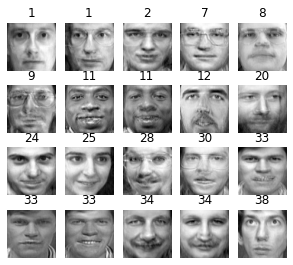

In [54]:
plot_faces(gen_faces, y_gen_faces)

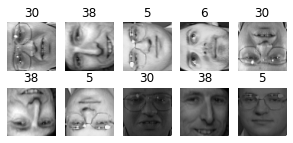

In [55]:
# Try to modify some images (e.g., rotate, flip, darken) and see if the model can detect the anomalies
# (i.e., compare the output of the score_samples() method for normal images and for anomalies).

n_rotated = 4
rotated = np.transpose(X_train[:n_rotated].reshape(-1, 64, 64), axes=[0, 2, 1])
rotated = rotated.reshape(-1, 64*64)
y_rotated = y_train[:n_rotated]

n_flipped = 3
flipped = X_train[:n_flipped].reshape(-1, 64, 64)[:, ::-1]
flipped = flipped.reshape(-1, 64*64)
y_flipped = y_train[:n_flipped]

n_darkened = 3
darkened = X_train[:n_darkened].copy()
darkened[:, 1:-1] *= 0.3
y_darkened = y_train[:n_darkened]

X_bad_faces = np.r_[rotated, flipped, darkened]
y_bad = np.concatenate([y_rotated, y_flipped, y_darkened])

plot_faces(X_bad_faces, y_bad)

In [56]:
X_bad_faces_pca = pca.transform(X_bad_faces)

In [57]:
gm.score_samples(X_bad_faces_pca)

array([-2.43643151e+07, -1.89784878e+07, -3.78112238e+07, -4.98187763e+07,
       -3.20479289e+07, -1.37531045e+07, -2.92374097e+07, -1.05488850e+08,
       -1.19575172e+08, -6.74255689e+07])

In [58]:
# The bad faces are all considered highly unlikely by the Gaussian Mixture model.
# Compare this to the scores of some training instances

gm.score_samples(X_train_pca[:10])

array([1163.02021041, 1134.03637824, 1156.32132926, 1170.6760282 ,
       1141.45404831, 1154.35205231, 1091.3289467 , 1111.41149488,
       1096.43049141, 1132.98982684])

In [59]:
# 13. Some dimensionality reduction techniques can also be used for anomaly detec‐
# tion. For example, take the Olivetti faces dataset and reduce it with PCA, preserv‐
# ing 99% of the variance. Then compute the reconstruction error for each image.
# Next, take some of the modified images you built in the previous exercise, and
# look at their reconstruction error: notice how much larger the reconstruction
# error is. If you plot a reconstructed image, you will see why: it tries to reconstruct
# a normal face

# Using Dimensionality Reduction Techniques for Anomaly Detection

In [60]:
# We already reduced the dataset using PCA earlier

X_train_pca

array([[ 3.7807965e+00, -1.8547919e+00, -5.1440434e+00, ...,
        -1.3562302e-01, -2.1408494e-01,  6.1192263e-02],
       [ 1.0148863e+01, -1.5275424e+00, -7.6698571e-01, ...,
         1.2392706e-01, -1.3526028e-01, -2.3275560e-02],
       [-1.0015288e+01,  2.8772771e+00, -9.1987532e-01, ...,
         7.2610632e-02, -2.9636156e-03,  1.2489575e-01],
       ...,
       [ 2.4758747e+00,  2.9559710e+00,  1.2998517e+00, ...,
        -2.0903945e-02,  3.4841422e-02, -1.5431902e-01],
       [-3.2203169e+00,  5.3489809e+00,  1.3942684e+00, ...,
         5.7550076e-02, -2.2830614e-01,  1.5557621e-01],
       [-9.2287689e-01, -3.6470284e+00,  2.2608795e+00, ...,
         1.3684945e-01, -6.9124810e-02,  6.2682413e-02]], dtype=float32)

In [61]:
def reconstruction_errors(pca, X):
    X_pca = pca.transform(X)
    X_reconstructed = pca.inverse_transform(X_pca)
    mse = np.square(X_reconstructed - X).mean(axis=-1)
    return mse

In [62]:
reconstruction_errors(pca, X_train).mean()

0.0001920535

In [63]:
reconstruction_errors(pca, X_bad_faces).mean()

0.004707354

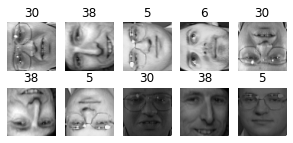

In [64]:
plot_faces(X_bad_faces, y_bad)

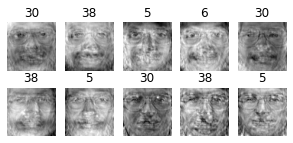

In [65]:
X_bad_faces_reconstructed = pca.inverse_transform(X_bad_faces_pca)
plot_faces(X_bad_faces_reconstructed, y_bad)